In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import japanize_matplotlib

In [3]:
df = pd.read_csv('california_housing_cleansing.csv')
df.head()

,Unnamed: 0,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,8,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,15,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,18,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [4]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()


,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [5]:
df.shape

(18572, 8)

In [9]:
# 各要素の標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
# 標準化の変換モデルの作成
X = df.to_numpy()
scaler.fit(X)

StandardScaler()

In [11]:
X_scaled = scaler.transform(X)
X_scaled

array([[ 2.95027401,  1.22609842, -0.98751408, ...,  2.745577  ,
         0.7095734 ,  0.01067288],
       [ 2.9351148 , -0.5234521 ,  0.80023789, ...,  1.76319575,
         0.90892516,  0.25820709],
       [-1.02729904,  1.31357595, -0.22735403, ...,  0.38723561,
         0.16225546,  0.6325512 ],
       ...,
       [-1.26959164, -0.87336221, -0.39847603, ..., -1.01586791,
         0.26894728,  0.344762  ],
       [-1.163095  , -0.78588468, -0.62721197, ..., -1.09521007,
         0.51108372,  0.63480794],
       [-0.83099363, -0.96083973, -0.0717104 , ..., -1.04614321,
         0.06368403,  0.19008646]])

## データセットのクラスタリング

In [12]:
# k-means法のクラス
from sklearn.cluster import KMeans

In [15]:
model = KMeans(n_init=10 ,n_clusters=4, random_state=0)

In [16]:
# 標準化済みデータX_scaledを用いてクラスタリングを実行
model.fit(X_scaled)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [17]:
model.labels_

array([3, 3, 2, ..., 2, 2, 2])

In [18]:
df['クラスター'] = model.labels_
df.head()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人,クラスター
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621,3
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641,3
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410,2
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026,2
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596,2


## クラスタリング結果に対する考察

<Axes: xlabel='クラスター', ylabel='count'>

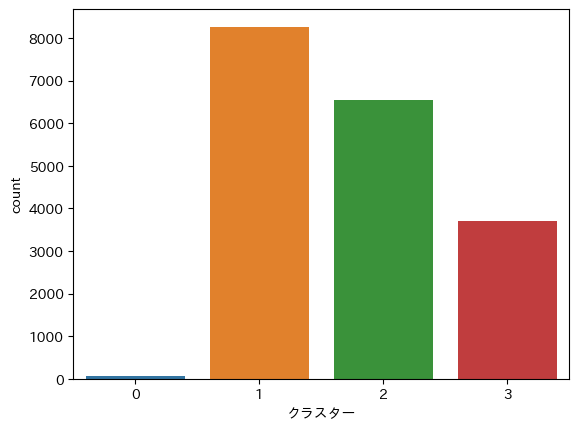

In [19]:
# クラスター別のデータ数の確認
sns.countplot(x='クラスター', data=df)

In [20]:
# クラスター別の平均値の比較
df.groupby('クラスター').mean()

# クラスター3の所得と住宅価格の高さに注目します。
# クラスター3は、富裕層が多いクラスターである可能性

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
クラスター,,,,,,,,
0,3.411902,17.844828,258.465517,37.657931,-119.398621,1.631759,15.491913,3.311716
1,3.096448,28.700508,1588.614230,33.949056,-117.934154,1.594186,1.617127,0.365254
2,3.247161,26.493284,1290.675519,38.029977,-121.591969,1.518446,1.993898,0.410637
3,5.821776,24.160087,1543.627096,34.917772,-119.218648,3.243935,2.335645,0.403256


<Axes: xlabel='経度', ylabel='緯度'>

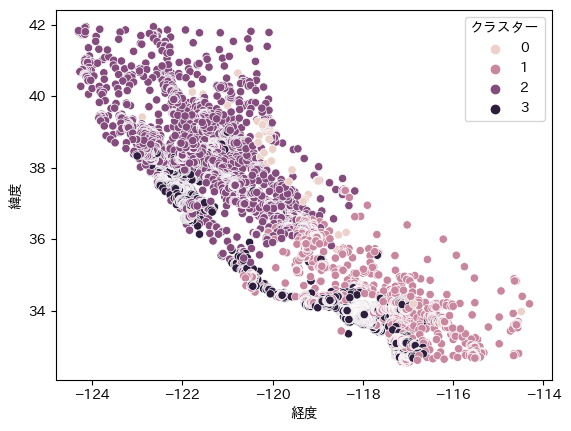

In [22]:
# 各クラスターと緯度経度の関係の確認
sns.scatterplot(x='経度', y='緯度', hue='クラスター', data=df)

# クラスター3に属するデータは、沿岸部に偏っているように見えます。


<Axes: xlabel='経度', ylabel='緯度'>

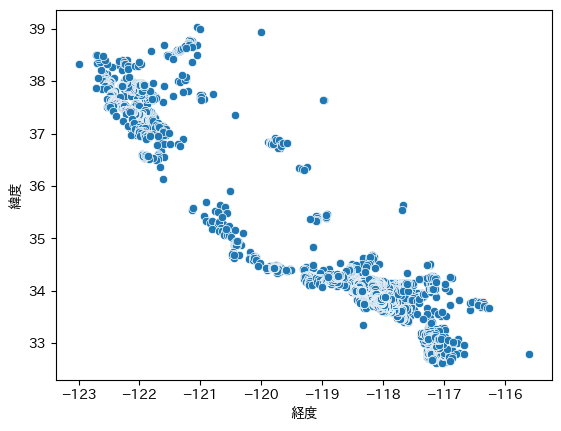

In [23]:
# 特定のクラスターに的を絞った深掘り
## 富裕層のクラスターと考えられるクラスター3に絞って、緯度と経度でマッピング

df_cluster3 = df.query('クラスター == 3')
sns.scatterplot(x='経度', y='緯度', data=df_cluster3)

# クラスター3は、沿岸部のなかでも特に、
# 北西端と南東端に比較的多く分布していることが確認できます

<Axes: xlabel='地域人口', ylabel='Count'>

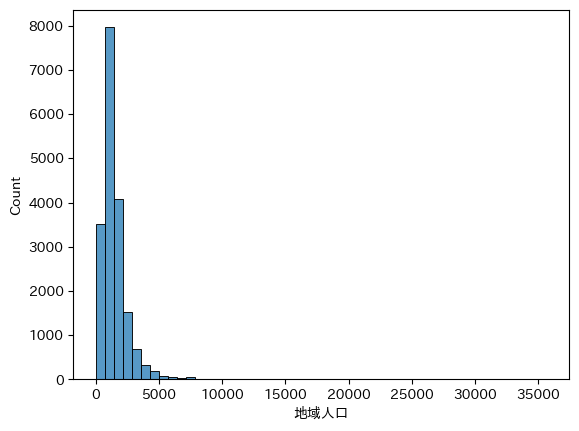

In [24]:
sns.histplot(x='地域人口', data=df, bins=50)

<Axes: xlabel='経度', ylabel='緯度'>

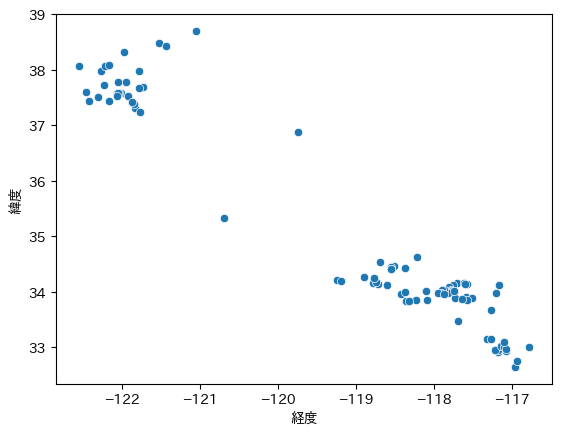

In [25]:
sns.scatterplot(x='経度', y='緯度', data=df_cluster3.query('地域人口 > 5000'))